Connection à Google drive

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importation des bibliothèques

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [160]:
df = pd.read_csv('/content/drive/MyDrive/Projet_ML_3A/Projet_ML.csv')

In [161]:
X=df.drop(columns=['outcome'])
y=df.loc[:,'outcome']

#Nettoyer la data 

In [162]:
df.head()

bidder_id   bid_id auction      merchandise  \
0  001068c415025a009fee375a12cff4fcnht8y  7179832   4ifac          jewelry   
1  0030a2dd87ad2733e0873062e4f83954mkj86  6805028   obbny           mobile   
2  00a0517965f18610417ee784a05f494d4dw6e  2501797   l3o6q  books and music   
3  00a0517965f18610417ee784a05f494d4dw6e  2724778   du967  books and music   
4  00a0517965f18610417ee784a05f494d4dw6e  2742648   wx3kf  books and music   

     device           time country               ip              url  \
0  phone561  5.140996e-308      bn  139.226.147.115  vasstdc27m7nks3   
1  phone313  5.139226e-308      ir     21.67.17.162  vnw40k8zzokijsv   
2  phone451  5.067829e-308      bh   103.165.41.136  kk7rxe25ehseyci   
3  phone117  5.068704e-308      tr  239.250.228.152  iu2iu3k137vakme   
4   phone16  5.068805e-308      in  255.108.248.101  u85yj2e7owkz6xp   

                         payment_account  \
0  a3d2de7675556553a5f08e4c88d2c228iiasc   
1  a3d2de7675556553a5f08e4c88d2c228jem8t   
2  52743ba515e9c1279ac76e19f00c0b001p3pm   
3  52743ba515e9c1279ac76e19f00c0b001p3pm   
4  52743ba515e9c1279ac76e19f00c0b001p3pm   

                                 address  outcome  
0  a3d2de7675556553a5f08e4c88d2c2282aj35        0  
1  f3bc67b04b43c3cebd1db5ed4941874c9br67        0  
2  7578f951008bd0b64528bf81b8578d5djy0uy        0  
3  7578f951008bd0b64528bf81b8578d5djy0uy        0  
4  7578f951008bd0b64528bf81b8578d5djy0uy        0

##Valeurs manquantes

In [163]:
df.shape

(100000, 12)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bidder_id        100000 non-null  object 
 1   bid_id           100000 non-null  int64  
 2   auction          100000 non-null  object 
 3   merchandise      100000 non-null  object 
 4   device           100000 non-null  object 
 5   time             100000 non-null  float64
 6   country          99816 non-null   object 
 7   ip               100000 non-null  object 
 8   url              100000 non-null  object 
 9   payment_account  100000 non-null  object 
 10  address          100000 non-null  object 
 11  outcome          100000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 9.2+ MB


On remarque que nous nous avons de nombreux features de type object (9/12)

In [165]:
df.isnull().sum()
#df.keys()[2]

bidder_id            0
bid_id               0
auction              0
merchandise          0
device               0
time                 0
country            184
ip                   0
url                  0
payment_account      0
address              0
outcome              0
dtype: int64

On constate que le feature 'country' a des valeurs manquantes

In [166]:
missCountry = df['country'].isnull().mean() * 100
missOutcome = df['outcome'].isnull().mean() * 100
missOutcome
missCountry
print(f"Pourcentage des valeurs manquantes par pays: {missCountry: .2f}%")
print(f"Pourcentage des valeurs manquantes des outcomes : {missOutcome: .2f}%")

Pourcentage des valeurs manquantes par pays:  0.18%
Pourcentage des valeurs manquantes des outcomes :  0.00%


 on remarque qu'il y'a des valeurs manquantes uniquement a niveau des pays. mais la proportion de ces valeurs sont très faibles (0.18%)

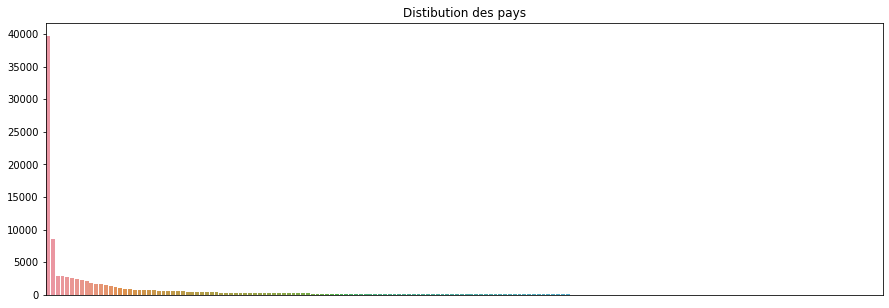

In [167]:
contryOccur = df['country'].value_counts()

fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x = contryOccur.index, y = contryOccur.values, ax = ax)
ax.get_xaxis().set_visible(False)
ax.set_title('Distibution des pays')

plt.show()

puisqu'on a des valeurs manquantes, on cherche à effectuer des imputations: Il existe trois principales techniques d'imputation des valeurs manquantes : **la moyenne**, **la médiane** et **le mode**. La moyenne est la moyenne de toutes les valeurs de l'ensemble, la médiane est le nombre médian d'un ensemble de nombres triés par taille et le mode est la valeur numérique la plus courante pour deux ensembles ou plus.Nous vérifions la répartition des pays et constatons qu'il y a un pays qui est significativement plus élevé que les autres. Par conséquent, l'imputation modale peut être une bonne approche.

In [169]:
#on remplit les valeurs nulles par le mode (la valeur la plus récurrente)
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [170]:
#df["bidder_id"].nunique()
#a['outcome'].value_counts()

#Feature Engineering

Les features quue nous avons ne seront pas pertinents si nous les utilisons directement. Nous allons déterminer d'autres features qui le seront à partir de ces derniers.

In [171]:
bidder_unique = X.groupby("bidder_id").nunique().reset_index()
bidder_unique.head()

bidder_id  bid_id  auction  merchandise  \
0  001068c415025a009fee375a12cff4fcnht8y       1        1            1   
1  0030a2dd87ad2733e0873062e4f83954mkj86       1        1            1   
2  00a0517965f18610417ee784a05f494d4dw6e     141       74            1   
3  00cc97158e6f4cb8eac3c0075918b7ffi5k8o       3        3            1   
4  01067975436d123f717ee5aba0dd4bbfa0937     543       17            1   

   device  time  country   ip  url  payment_account  address  
0       1     1        1    1    1                1        1  
1       1     1        1    1    1                1        1  
2      67   141       16  103   84                1        1  
3       3     3        2    3    1                1        1  
4     165   543       71  398    4                1        1

Ici nous avons groupé les features par bidder_id pour obtenir des informations plus utiles comme le nombre d'action,de bids, de devices relatif à un bidder. Ces caractéristiques nous permettront de distinguer un robot d'un humain. 

In [172]:
bidder_unique.shape

(87, 11)

In [173]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.3)

In [174]:
Xtrain.keys()

Index(['bidder_id', 'bid_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address'],
      dtype='object')

In [175]:
train_set = Xtrain.drop(columns = ['bid_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address'], errors = 'ignore')

In [176]:
train_set = train_set.merge(bidder_unique, on='bidder_id', how='left')

In [177]:
train_set.shape

(70000, 11)

In [178]:
train_set = train_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
train_set = train_set.fillna(0)

In [179]:
train_set.keys()

Index(['bidder_id', 'num_bids', 'num_auct', 'num_merch_type',
       'num_device_type', 'num_time', 'num_ctry', 'num_ip', 'num_url',
       'payment_account', 'address'],
      dtype='object')

In [180]:
train_set['bidder_id'].value_counts()

047558bebab9292a5d4c85d6ee768784j2hdd    15523
055282b75717345ba6f53d40e9e6d6c56qrzp     9140
037d9f10da403d8d5f94b6e2957a3702f6x07     9075
0318e0a173f7c65db40116b903884c854x258     7718
03aafab9868455b78f0723eda86698ba9v9rm     7548
                                         ...  
068450aafae2a6e390e35925d964290cdliqf        1
01f498a0992d280de63ec346692efb2blckg2        1
001068c415025a009fee375a12cff4fcnht8y        1
08c39ef7252995e0749f7927249b8dcb1d3xh        1
069d020584a0e8c61e622321d4c43881j7pl3        1
Name: bidder_id, Length: 81, dtype: int64

In [181]:
test_set = Xtest.drop(columns = ['bid_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address'], errors = 'ignore')
test_set = test_set.merge(bidder_unique, on='bidder_id', how='left')
test_set = test_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
test_set = test_set.fillna(0)
test_set.head()

bidder_id  num_bids  num_auct  num_merch_type  \
0  055282b75717345ba6f53d40e9e6d6c56qrzp     13133       346               1   
1  0ad17aa9111f657d71cd3005599afc24fd44y      5428       461               1   
2  0ad17aa9111f657d71cd3005599afc24fd44y      5428       461               1   
3  047558bebab9292a5d4c85d6ee768784j2hdd     22217       231               1   
4  06a58d4af0fe7ee15324b0e921e8de1260vef      9595       521               1   

   num_device_type  num_time  num_ctry  num_ip  num_url  payment_account  \
0              920     12420       129    7486     5658                1   
1              470      5355        81    4145     1299                1   
2              470      5355        81    4145     1299                1   
3              650     21620        80   12517     3259                1   
4              762      9503       127    5817      493                1   

   address  
0        1  
1        1  
2        1  
3        1  
4        1

In [182]:
test_set.shape

(30000, 11)

In [185]:
test_set['bidder_id'].value_counts()

047558bebab9292a5d4c85d6ee768784j2hdd    6694
055282b75717345ba6f53d40e9e6d6c56qrzp    3993
037d9f10da403d8d5f94b6e2957a3702f6x07    3826
0318e0a173f7c65db40116b903884c854x258    3242
03aafab9868455b78f0723eda86698ba9v9rm    3228
                                         ... 
024937af9ea18a2b57e4f08762d181f7s8a3z       1
05ae7ea9549ae298bbbc8002b4229392e0ilf       1
0a92c4fa2bcdc8e952546d236b322053o5wbk       1
0a9d614009139236f198ddb4759a498cen5ix       1
090c77ac89c7063f0d0ce064ce3cb3afllf5h       1
Name: bidder_id, Length: 73, dtype: int64

# Ajout de nouveaux features

In [183]:
time_df = X.sort_values(['bidder_id', 'time'])
time_df.head(10)

bidder_id   bid_id auction      merchandise  \
0  001068c415025a009fee375a12cff4fcnht8y  7179832   4ifac          jewelry   
1  0030a2dd87ad2733e0873062e4f83954mkj86  6805028   obbny           mobile   
2  00a0517965f18610417ee784a05f494d4dw6e  2501797   l3o6q  books and music   
3  00a0517965f18610417ee784a05f494d4dw6e  2724778   du967  books and music   
4  00a0517965f18610417ee784a05f494d4dw6e  2742648   wx3kf  books and music   
5  00a0517965f18610417ee784a05f494d4dw6e  2852666   gb2b8  books and music   
6  00a0517965f18610417ee784a05f494d4dw6e  2915632   cci6c  books and music   
7  00a0517965f18610417ee784a05f494d4dw6e  3980517   bpil5  books and music   
8  00a0517965f18610417ee784a05f494d4dw6e  4040347   gst86  books and music   
9  00a0517965f18610417ee784a05f494d4dw6e  4361678   2n3xc  books and music   

      device           time country               ip              url  \
0   phone561  5.140996e-308      bn  139.226.147.115  vasstdc27m7nks3   
1   phone313  5.139226e-308      ir     21.67.17.162  vnw40k8zzokijsv   
2   phone451  5.067829e-308      bh   103.165.41.136  kk7rxe25ehseyci   
3   phone117  5.068704e-308      tr  239.250.228.152  iu2iu3k137vakme   
4    phone16  5.068805e-308      in  255.108.248.101  u85yj2e7owkz6xp   
5  phone1008  5.069665e-308      id  255.107.151.243  kk7rxe25ehseyci   
6   phone154  5.070108e-308      ng    37.95.134.218  vasstdc27m7nks3   
7   phone419  5.075525e-308      in    58.209.11.187  jynce1r4nc22vrd   
8   phone154  5.075808e-308      ng    37.95.134.218  hp6dl92uen73trp   
9    phone15  5.076799e-308      th    128.3.198.137  vasstdc27m7nks3   

                         payment_account  \
0  a3d2de7675556553a5f08e4c88d2c228iiasc   
1  a3d2de7675556553a5f08e4c88d2c228jem8t   
2  52743ba515e9c1279ac76e19f00c0b001p3pm   
3  52743ba515e9c1279ac76e19f00c0b001p3pm   
4  52743ba515e9c1279ac76e19f00c0b001p3pm   
5  52743ba515e9c1279ac76e19f00c0b001p3pm   
6  52743ba515e9c1279ac76e19f00c0b001p3pm   
7  52743ba515e9c1279ac76e19f00c0b001p3pm   
8  52743ba515e9c1279ac76e19f00c0b001p3pm   
9  52743ba515e9c1279ac76e19f00c0b001p3pm   

                                 address  
0  a3d2de7675556553a5f08e4c88d2c2282aj35  
1  f3bc67b04b43c3cebd1db5ed4941874c9br67  
2  7578f951008bd0b64528bf81b8578d5djy0uy  
3  7578f951008bd0b64528bf81b8578d5djy0uy  
4  7578f951008bd0b64528bf81b8578d5djy0uy  
5  7578f951008bd0b64528bf81b8578d5djy0uy  
6  7578f951008bd0b64528bf81b8578d5djy0uy  
7  7578f951008bd0b64528bf81b8578d5djy0uy  
8  7578f951008bd0b64528bf81b8578d5djy0uy  
9  7578f951008bd0b64528bf81b8578d5djy0uy

In [106]:
firstdiff = time_df.groupby('bidder_id')[['time']].diff()
firstdiff.head(10)

time
0            NaN
1            NaN
2            NaN
3  8.748082e-312
4  1.008414e-312
5  8.608704e-312
6  4.425268e-312
7  5.416988e-311
8  2.826055e-312
9  9.911477e-312

In [107]:
time_df['first_diff'] = firstdiff
firstdiff_feat = time_df[['bidder_id', 'first_diff']].dropna()
firstdiff_feat.head()

bidder_id     first_diff
3  00a0517965f18610417ee784a05f494d4dw6e  8.748082e-312
4  00a0517965f18610417ee784a05f494d4dw6e  1.008414e-312
5  00a0517965f18610417ee784a05f494d4dw6e  8.608704e-312
6  00a0517965f18610417ee784a05f494d4dw6e  4.425268e-312
7  00a0517965f18610417ee784a05f494d4dw6e  5.416988e-311

In [108]:
bid_intervals = firstdiff_feat.groupby('bidder_id')[['first_diff']].describe().reset_index()
bid_intervals = bid_intervals.droplevel(axis=1, level=0)
bid_intervals = bid_intervals.rename(columns = {'': 'bidder_id', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
bid_intervals.head()

bidder_id      mean_diff  std_diff  \
0  00a0517965f18610417ee784a05f494d4dw6e  5.421709e-312       0.0   
1  00cc97158e6f4cb8eac3c0075918b7ffi5k8o  2.715780e-310       0.0   
2  01067975436d123f717ee5aba0dd4bbfa0937  2.477525e-313       0.0   
3  012441119bcf83b23d4768bb72cea6d6carua  5.555615e-312       0.0   
4  01255c2c7c5578c186873422fc00fd7afwk8k  2.050234e-312       0.0   

        min_diff    median_diff       max_diff       iqr_diff  
0  5.200691e-315  5.549137e-313  4.953029e-310  1.869648e-312  
1  5.341110e-313  2.715780e-310  5.426219e-310  2.710439e-310  
2  5.200691e-316  1.388584e-313  9.589034e-312  2.426122e-313  
3  1.040138e-315  4.696484e-312  2.553227e-311  6.556641e-312  
4  5.720760e-315  1.119969e-312  1.442516e-311  2.358513e-312

In [110]:
train_set = train_set.merge(bid_intervals, on='bidder_id', how='left')
train_set = train_set.fillna(train_set.median())

test_set = test_set.merge(bid_intervals, on='bidder_id', how='left')
test_set = test_set.fillna(test_set.median())

<ipython-input-110-6fe27e3a24a5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_set = train_set.fillna(train_set.median())
<ipython-input-110-6fe27e3a24a5>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_set = test_set.fillna(test_set.median())


In [111]:
concurrent_bids = firstdiff_feat[firstdiff_feat['first_diff'] == 0].groupby('bidder_id').count().reset_index()
concurrent_bids = concurrent_bids.rename(columns = {'first_diff': 'num_concurrent_bids'})
concurrent_bids.head()

bidder_id  num_concurrent_bids
0  022ac3a7ce986049d9a4bede83ccf9ddctvg6                  325
1  0318e0a173f7c65db40116b903884c854x258                  222
2  037d9f10da403d8d5f94b6e2957a3702f6x07                  325
3  03a1e81cb7bcd15014489a6f752c9d5b7pvel                    1
4  03aafab9868455b78f0723eda86698ba9v9rm                  187

In [112]:
train_set = train_set.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)

In [113]:
test_set = test_set.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)

In [115]:
first_bid = X.sort_values(['auction', 'time'])
first_bid = first_bid.groupby('auction').first().reset_index()
first_bid = first_bid.groupby('bidder_id').count()['bid_id'].reset_index()
first_bid = first_bid.rename(columns = {'bid_id': 'num_first_bid'})
first_bid.head()

bidder_id  num_first_bid
0  00a0517965f18610417ee784a05f494d4dw6e             14
1  01067975436d123f717ee5aba0dd4bbfa0937             11
2  01255c2c7c5578c186873422fc00fd7afwk8k              3
3  01349288df20199905e719f0ff7ee771nwryj              2
4  0141844fc725a85e38e12cc02fcdbbe8ofqxv              4

In [117]:
last_bid = X.sort_values(['auction', 'time'], ascending = [True, False])
last_bid = last_bid.groupby('auction').first().reset_index()
last_bid = last_bid.groupby('bidder_id').count()['bid_id'].reset_index()
last_bid = last_bid.rename(columns = {'bid_id': 'num_last_bid'})
last_bid.head()

bidder_id  num_last_bid
0  001068c415025a009fee375a12cff4fcnht8y             1
1  00a0517965f18610417ee784a05f494d4dw6e            23
2  01067975436d123f717ee5aba0dd4bbfa0937            10
3  012441119bcf83b23d4768bb72cea6d6carua             3
4  01255c2c7c5578c186873422fc00fd7afwk8k             3

In [118]:
train_set = train_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
train_set = train_set.merge(last_bid, on='bidder_id', how='left').fillna(0)

In [119]:
test_set = test_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
test_set = test_set.merge(last_bid, on='bidder_id', how='left').fillna(0)

In [121]:
train_set.keys()

Index(['bidder_id', 'num_bids', 'num_auct', 'num_merch_type',
       'num_device_type', 'num_time', 'num_ctry', 'num_ip', 'num_url',
       'payment_account', 'address', 'mean_diff', 'std_diff', 'min_diff',
       'median_diff', 'max_diff', 'iqr_diff', 'num_concurrent_bids',
       'num_first_bid', 'num_last_bid'],
      dtype='object')

In [155]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_bids             70000 non-null  int64  
 1   num_auct             70000 non-null  int64  
 2   num_merch_type       70000 non-null  int64  
 3   num_device_type      70000 non-null  int64  
 4   num_time             70000 non-null  int64  
 5   num_ctry             70000 non-null  int64  
 6   num_ip               70000 non-null  int64  
 7   num_url              70000 non-null  int64  
 8   payment_account      70000 non-null  int64  
 9   address              70000 non-null  int64  
 10  mean_diff            70000 non-null  float64
 11  std_diff             70000 non-null  float64
 12  min_diff             70000 non-null  float64
 13  median_diff          70000 non-null  float64
 14  max_diff             70000 non-null  float64
 15  iqr_diff             70000 non-null 

## Model Validation 

In [122]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [ ]:
#X=train_set.drop(columns=['outcome','bidder_id'])
#y=train_set.loc[:,'outcome']

In [ ]:
#y=y.values.reshape(-1,1)

In [ ]:
y.shape

(100000,)

In [131]:
train_set=train_set.drop(columns=['bidder_id'])
test_set=test_set.drop(columns=['bidder_id'])

In [142]:
train_set.shape
train_set

num_bids  num_auct  num_merch_type  num_device_type  num_time  \
0         22217       231               1              650     21620   
1         22217       231               1              650     21620   
2         13133       346               1              920     12420   
3         22217       231               1              650     21620   
4          3005       279               1              235      2994   
...         ...       ...             ...              ...       ...   
69995     13133       346               1              920     12420   
69996     13133       346               1              920     12420   
69997       543        17               1              165       543   
69998     12901       592               1              786     12576   
69999      5428       461               1              470      5355   

       num_ctry  num_ip  num_url  payment_account  address      mean_diff  \
0            80   12517     3259                1        1  3.438311e-314   
1            80   12517     3259                1        1  3.438311e-314   
2           129    7486     5658                1        1  1.026186e-314   
3            80   12517     3259                1        1  3.438311e-314   
4            11    1034      941                1        1  2.542700e-313   
...         ...     ...      ...              ...      ...            ...   
69995       129    7486     5658                1        1  1.026186e-314   
69996       129    7486     5658                1        1  1.026186e-314   
69997        71     398        4                1        1  2.477525e-313   
69998        45    5128     6609                1        1  1.044936e-314   
69999        81    4145     1299                1        1  1.518234e-314   

       std_diff       min_diff    median_diff       max_diff       iqr_diff  \
0           0.0   0.000000e+00  7.280967e-315  4.942986e-310  1.196159e-314   
1           0.0   0.000000e+00  7.280967e-315  4.942986e-310  1.196159e-314   
2           0.0   0.000000e+00  3.640484e-315  3.380449e-313  8.841175e-315   
3           0.0   0.000000e+00  7.280967e-315  4.942986e-310  1.196159e-314   
4           0.0   0.000000e+00  4.992663e-314  4.946632e-310  9.101209e-314   
...         ...            ...            ...            ...            ...   
69995       0.0   0.000000e+00  3.640484e-315  3.380449e-313  8.841175e-315   
69996       0.0   0.000000e+00  3.640484e-315  3.380449e-313  8.841175e-315   
69997       0.0  5.200691e-316  1.388584e-313  9.589034e-312  2.426122e-313   
69998       0.0   0.000000e+00  6.760898e-315  4.108546e-313  1.144152e-314   
69999       0.0   0.000000e+00  1.092145e-314  2.818775e-313  1.508200e-314   

       num_concurrent_bids  num_first_bid  num_last_bid  
0                    597.0          132.0         150.0  
1                    597.0          132.0         150.0  
2                    713.0          256.0         288.0  
3                    597.0          132.0         150.0  
4                     11.0          252.0         241.0  
...                    ...            ...           ...  
69995                713.0          256.0         288.0  
69996                713.0          256.0         288.0  
69997                  0.0           11.0          10.0  
69998                325.0          561.0         560.0  
69999                 73.0          316.0         214.0  

[70000 rows x 19 columns]

In [141]:
test_set.shape

(30000, 19)

# Random forest

In [132]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=5, n_estimators=10)
#Train the model using the training sets y_pred=clf.predict(Xtest)
clf.fit(train_set,ytrain)
# prediction on test set
ypred=clf.predict(test_set)

In [133]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 1.0


In [139]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27273
           1       1.00      1.00      1.00      2727

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [134]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from time import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

In [135]:
rf1 = RandomForestClassifier(random_state = 0)
ros = RandomOverSampler(sampling_strategy = 0.2, random_state = 456)
pp1 = make_pipeline(ros, rf1)

base_models = [pp1]

In [136]:
from time import time
def cv(models, X, y):
    start = time()

    rskfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 456) 
    k_fold_AUC = []

    for train_index, test_index in rskfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_proba = []
        for model in models:
            model.fit(X_train, y_train)
            sub_y_proba = model.predict_proba(X_test)[:, 1]
            y_proba.append(sub_y_proba)
        y_proba = np.mean(y_proba, axis = 0)

        AUC = roc_auc_score(y_test, y_proba)
        k_fold_AUC.append(AUC)
    
    mean_AUC = np.mean(k_fold_AUC)
    
    end = time()


In [138]:
 cv([base_models[0]], train_set, ytrain) # model with random_state = 456 used as reference

# Regression Logistique

In [143]:
modele_logi = LogisticRegression(penalty='none',solver='newton-cg')
modele_logi.fit(train_set,ytrain)

LogisticRegression(penalty='none', solver='newton-cg')

In [144]:
modele_logi.score(test_set,ytest)

1.0

In [156]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27273
           1       1.00      0.80      0.89      2727

    accuracy                           0.98     30000
   macro avg       0.99      0.90      0.94     30000
weighted avg       0.98      0.98      0.98     30000



# SVM

In [147]:
from sklearn.svm import SVC
regresso = SVC(kernel = 'rbf')
regresso.fit(train_set, ytrain)
ypred=regresso.predict(test_set)

In [148]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27273
           1       1.00      0.80      0.89      2727

    accuracy                           0.98     30000
   macro avg       0.99      0.90      0.94     30000
weighted avg       0.98      0.98      0.98     30000

